### One test descriptive statistics
___

Using exercises spreadsheets from Designing and Analyzing Language Tests by Oxford.

The purpose of this notebook is to compute the total score for each student and his or her percentage correct score, and then to calculate the various descriptive statistics.

<br>

#### General Setup
___

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# styling for plots
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (14,5)

<br>

#### Load the data
___

In [3]:
test = pd.read_excel('Data/one_test.xlsx')
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,Student01,0,0,0,0,0,1,1,1,0,...,1,1,1,0,1,0,0,0,0,0
1,Student02,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,0,1,0,1,1
2,Student03,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,1,1
3,Student04,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,0,1,0,1
4,Student05,1,1,1,1,1,0,0,0,1,...,0,1,1,0,1,1,1,0,1,0


In [4]:
# check the dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Student  30 non-null     object
 1   Q01      30 non-null     int64 
 2   Q02      30 non-null     int64 
 3   Q03      30 non-null     int64 
 4   Q04      30 non-null     int64 
 5   Q05      30 non-null     int64 
 6   Q06      30 non-null     int64 
 7   Q07      30 non-null     int64 
 8   Q08      30 non-null     int64 
 9   Q09      30 non-null     int64 
 10  Q10      30 non-null     int64 
 11  Q11      30 non-null     int64 
 12  Q12      30 non-null     int64 
 13  Q13      30 non-null     int64 
 14  Q14      30 non-null     int64 
 15  Q15      30 non-null     int64 
 16  Q16      30 non-null     int64 
 17  Q17      30 non-null     int64 
 18  Q18      30 non-null     int64 
 19  Q19      30 non-null     int64 
 20  Q20      30 non-null     int64 
dtypes: int64(20), object(1)
memory usage: 5.0

The dataset contains dichotomous test results for 20 students. 

In [5]:
# calculate total correct answers and add it to the dataframe
test['Total'] = test.loc[:, test.columns != 'Student'].sum(axis=1)
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total
0,Student01,0,0,0,0,0,1,1,1,0,...,1,1,0,1,0,0,0,0,0,7
1,Student02,1,1,1,1,1,0,1,1,1,...,0,1,1,1,0,1,0,1,1,16
2,Student03,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,1,1,8
3,Student04,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,7
4,Student05,1,1,1,1,1,0,0,0,1,...,1,1,0,1,1,1,0,1,0,13


In [6]:
# calculate percetage of correct answers
test['% Correct'] = test['Total'] / len(test.columns[1:21]) * 100
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total,% Correct
0,Student01,0,0,0,0,0,1,1,1,0,...,1,0,1,0,0,0,0,0,7,35.0
1,Student02,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,0,1,1,16,80.0
2,Student03,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,8,40.0
3,Student04,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,7,35.0
4,Student05,1,1,1,1,1,0,0,0,1,...,1,0,1,1,1,0,1,0,13,65.0


<br>

#### Descriptive stats
___

In [7]:
# calculate pandas stats and converting it to a dataframe
stats = pd.DataFrame([test['Total'].describe(), test['% Correct'].describe()]).T
stats

,Total,% Correct
count,30.000000,30.000000
mean,10.833333,54.166667
std,3.639660,18.198301
min,3.000000,15.000000
25%,8.000000,40.000000
50%,11.000000,55.000000
75%,13.000000,65.000000
max,19.000000,95.000000


In [8]:
# renaming the std to std(sample) and add std for population
stats.loc['std(sample)'] = stats.loc['std']
stats.loc['std(pop)'] = [test['Total'].std(ddof=0), test['% Correct'].std(ddof=0)]

# renaming the min and max 
stats.loc['high score'] = stats.loc['max']
stats.loc['low score'] = stats.loc['min']
stats.loc['n'] = stats.loc['count']

# adding other stats
stats.loc['mode'] = [ss.mode(test['Total'])[0][0], ss.mode(test['% Correct'])[0][0]]
stats.loc['var(sample)'] = [test['Total'].var(), test['% Correct'].var()/100]
stats.loc['var(pop)'] = [test['Total'].var(ddof=0), test['% Correct'].var(ddof=0)/100]
stats.loc['range'] = stats.loc['high score'] - stats.loc['low score'] + 1
stats.loc['Q'] = (stats.loc['75%'] - stats.loc['25%']) / 2
stats.loc['skewness'] =  [test['Total'].skew(), test['% Correct'].skew()]
stats.loc['SES'] = np.sqrt((6*stats.loc['n'] * (stats.loc['n']-1)) / 
                           ((stats.loc['n']-2) * (stats.loc['n']+1) * (stats.loc['n']+3)))
stats.loc['skew/SES'] = stats.loc['skewness'] / stats.loc['SES']
stats.loc['kurtosis'] =  test['Total'].kurt()
stats.loc['SEK'] = np.sqrt((4*(stats.loc['n']**2-1)*stats.loc['SES']**2)
                           /((stats.loc['n']-3)*(stats.loc['n']+5)))
stats.loc['kurt/SEK'] = stats.loc['kurtosis'] / stats.loc['SEK']

# removing not needed lines
stats.drop(['std', 'min', 'max', 'count'], axis=0, inplace=True)
stats

,Total,% Correct
mean,10.833333,54.166667
25%,8.000000,40.000000
50%,11.000000,55.000000
75%,13.000000,65.000000
std(sample),3.639660,18.198301
std(pop),3.578485,17.892425
high score,19.000000,95.000000
low score,3.000000,15.000000
n,30.000000,30.000000
mode,7.000000,35.000000


In [9]:
# round all stats to two decimal points and changing the order
stats = np.round(stats, 3)
stats = stats.reindex(index = ['mean','mode','25%', '50%', '75%', 'high score', 'low score', 
                       'range', 'std(pop)', 'std(sample)', 'var(pop)', 'var(sample)', 'Q', 'n',
                      'skewness', 'SES', 'skew/SES','kurtosis', 'SEK', 'kurt/SEK'])
stats.index.name = 'Statistics'
stats

,Total,% Correct
Statistics,,
mean,10.833,54.167
mode,7.000,35.000
25%,8.000,40.000
50%,11.000,55.000
75%,13.000,65.000
high score,19.000,95.000
low score,3.000,15.000
range,17.000,81.000
std(pop),3.578,17.892


<br>

#### Plotting.
___


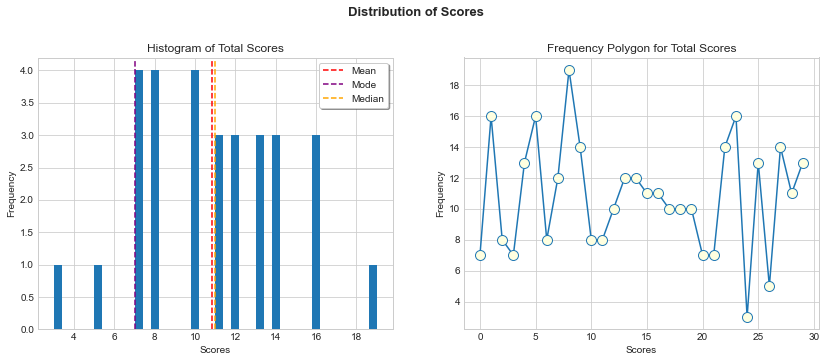

In [10]:
# histograms and frequency polygon
fig, [ax0, ax1] = plt.subplots(1,2)
fig.suptitle('Distribution of Scores', y=1.02, weight='bold', fontsize=13)

# total scores
ax0.hist(test['Total'], bins=40)
ax0.set(title='Histogram of Total Scores',
      xlabel='Scores',
      ylabel='Frequency')
ax0.axvline(stats.loc['mean'][0], linestyle='--', c='red', label='Mean')
ax0.axvline(stats.loc['mode'][0], linestyle='--', c='purple', label='Mode')
ax0.axvline(stats.loc['50%'][0], linestyle='--', c='orange', label='Median')

# total scores
ax1.plot(test['Total'],marker='.', linestyle='solid', markersize=20, markerfacecolor='lightyellow')
ax1.set(title='Frequency Polygon for Total Scores',
      xlabel='Scores',
      ylabel='Frequency')

# display legend
ax0.legend(frameon=True, fancybox=True, shadow=True)

# save the plot
plt.savefig('Data/distribution_of_scores.png', bbox_inches='tight');

<br>

#### Standard Scores.
___

In [11]:
# calculating z and T scores
test['z'] = np.round((test['Total'] - stats.loc['mean'][0])/stats.loc['std(pop)'][0],1)
test['T'] = test['z'] * 10 + 50
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q15,Q16,Q17,Q18,Q19,Q20,Total,% Correct,z,T
0,Student01,0,0,0,0,0,1,1,1,0,...,1,0,0,0,0,0,7,35.0,-1.1,39.0
1,Student02,1,1,1,1,1,0,1,1,1,...,1,0,1,0,1,1,16,80.0,1.4,64.0
2,Student03,1,0,0,0,0,0,0,1,0,...,0,0,1,1,1,1,8,40.0,-0.8,42.0
3,Student04,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,7,35.0,-1.1,39.0
4,Student05,1,1,1,1,1,0,0,0,1,...,1,1,1,0,1,0,13,65.0,0.6,56.0


In [12]:
# create stats for z and T
stats_for_scores = pd.DataFrame({'mean': [test['z'].mean(), test['T'].mean()],
                                 'std(pop)': [test['z'].std(ddof=0), test['T'].std(ddof=0)]})

stats_for_scores = stats_for_scores.T 
stats_for_scores.columns = ['z', 'T']

# add it to the rest of the stats
stats = stats.join(np.round(stats_for_scores,3))

<br>

#### Save the results to an excel file
___

In [13]:
# write and save 3 dataframes to the excel file 
writer = pd.ExcelWriter('Data/one_test_descriptive_stats.xlsx', engine='xlsxwriter')
test.to_excel(writer, index = False)
stats.to_excel(writer, startrow=len(test)+3, index=True)

# insert the image into the worksheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.insert_image('H34', 'Data/distribution_of_scores.png')
writer.save()

<br>

___
#### End.